# Step 1 - Load the dataset



After loading the dataset, we remove the 6th column which provides the output y: Scaled sound pressure level, in decibels. 

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


import pandas as pd
import numpy as np
results = []
with open('Airfoil_self_noise.txt') as inputfile:
    for line in inputfile:
        results.append(line.strip().split('\t'))

df = pd.DataFrame(np.array(results), columns = list("abcdef"))
df = df.drop(['f'], 1)
df

Saving DataSet3.txt to DataSet3.txt
User uploaded file "DataSet3.txt" with length 59982 bytes


,a,b,c,d,e
0,800,0,0.3048,71.3,0.00266337
1,1000,0,0.3048,71.3,0.00266337
2,1250,0,0.3048,71.3,0.00266337
3,1600,0,0.3048,71.3,0.00266337
4,2000,0,0.3048,71.3,0.00266337
5,2500,0,0.3048,71.3,0.00266337
6,3150,0,0.3048,71.3,0.00266337
7,4000,0,0.3048,71.3,0.00266337
8,5000,0,0.3048,71.3,0.00266337
9,6300,0,0.3048,71.3,0.00266337


# Step 1.1 Some preprocessing

Here, we assign float values to our dataframe's content and create an array [1503 instances x 2 attributes] to cluster, using the implemented K-Means and our custom K-Means algorithm  and plot the results.

In [2]:
L = df.as_matrix(columns=None)
L_float = L.astype(np.float)
print(L.shape)
M_new = L_float[:, 3:5]

print(M_new.shape)

N = L_float[:, 0:3]
N_new = N[0:200, :]

print(N_new.shape)

(1503, 5)
(1503, 2)
(200, 3)


# Step 2 - Implemented K-Means algorithm

We cluster our dataset based on 2 attributes:
    1. Frequency, in Hertzs. 
    2. Angle of attack, in degrees.
and plot the clustered 2-D datapoints.

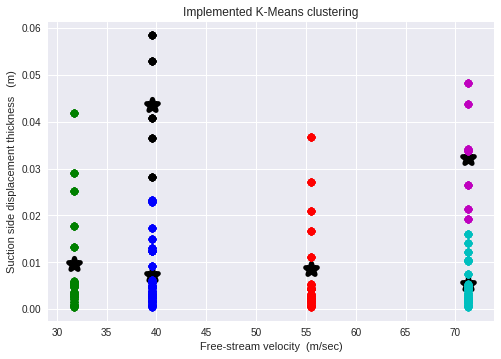

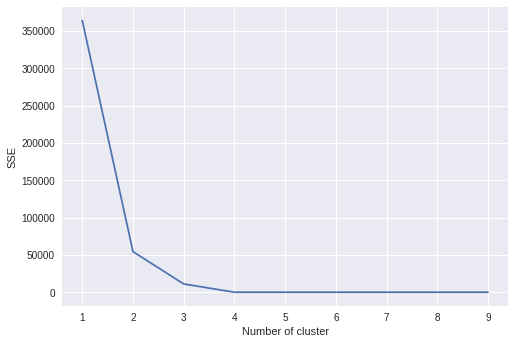

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

clf = KMeans(n_clusters=6)
clf.fit(M_new)
centroids = clf.cluster_centers_
#print(centroids.shape)
labels = clf.labels_

colors = 10*["g.", "c.", "r.", "b.", "k.", "m."]
iter = 0
for i in range(len(M_new)):
    iter+=1
    #print(iter)
    plt.plot(M_new[i][0], M_new[i][1], colors[labels[i]], markersize = 15)
    plt.title('Implemented K-Means clustering')
    plt.xlabel('Free-stream velocity  (m/sec)')
    plt.ylabel('Suction side displacement thickness   (m)')
    
plt.scatter(centroids[:,0], centroids[:,1], color='black', marker='*', s=150, linewidths=5, label='centroids')
plt.show()


sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(M_new)
    labels1 = kmeans.labels_
    
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

# Step 3 - Custom Batch K-Means algorithm

Here, we execute our custom K-Means algorithm for the dataset, based on 2 attributes:

    1. Frequency, in Hertzs. 
    2. Angle of attack, in degrees. 

For each iteration of the algorithm, we show the change in the distance between the new centroid and the previous one (as percent), until convergence.

We also provide, the population of each cluster(number of datapoints assigned per cluster), which gives us an understanding of which K value is optimal for the algorithm.

The code for custom batch K-Means is borrowed from Sentex:

https://www.youtube.com/channel/UCfzlCWGWYyIQ0aLC5w48gBQ

284.3457849795412


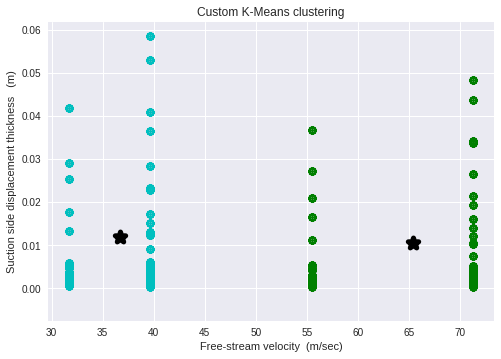

		 Cluster 1 has: 742 data points
		 Cluster 2 has: 761 data points


In [5]:
# sklearn_pca_x = pca.fit_transform(L_float)
# print(sklearn_pca_x)
# # y = np.zeros((len(sklearn_pca_x),1)).astype(int)
# #print(y)


import matplotlib.pyplot as plt
# plt.scatter(M_new[:,0], M_new[:,1] , 
#                marker=".", color="r", s=120, linewidths=5)
# plt.show()




colors = 10*["g", "c", "r", "b", "k", "o"]

class K_Means:
    def __init__(self, k=2, tol=0.0001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
    
    def fit(self,data):
        self.centroids = {}
        
        for i in range(self.k):
            self.centroids[i] = data[-i]
            
        for i in range(self.max_iter):
            self.classifications= {}
            
            for i in range(self.k):
                self.classifications[i] = []
            iter=0    
            for featureset in data:
                iter+=1
                #print(iter)
                distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)
                
            prev_centroids = dict(self.centroids)
            
            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification], axis=0)
                
            optimized =True
                
            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid - original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid - original_centroid)/original_centroid*100.0))
                    optimized = False
                
            if optimized:
               break
                    
                    
    def predict(self,data):
        distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification
    
clf = K_Means()
clf.fit(M_new)

for centroid in clf.centroids:
    if(np.isnan(clf.centroids[centroid]).any() == True):
       continue    
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
               marker="*", color="k", s=120, linewidths=5)
    
for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker=".", color=color, s=15, linewidths=6)
        
        
plt.title('Custom K-Means clustering')
plt.xlabel('Free-stream velocity  (m/sec)')
plt.ylabel('Suction side displacement thickness   (m)')        
plt.show()

print('\t\t','Cluster {no} has: {number} data points'.format(no=1, number=len(clf.classifications[0])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=2, number=len(clf.classifications[1])))

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:1128: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


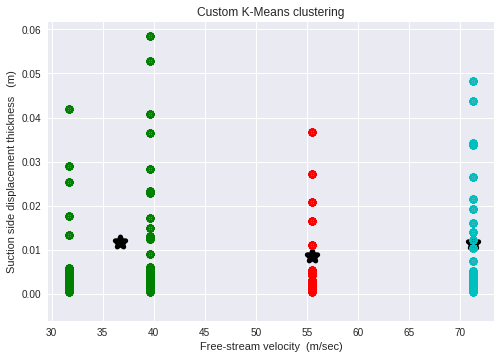

		 Cluster 1 has: 761 data points
		 Cluster 2 has: 465 data points
		 Cluster 3 has: 277 data points
		 Cluster 4 has: 0 data points
		 Cluster 5 has: 0 data points
		 Cluster 6 has: 0 data points


In [6]:
# sklearn_pca_x = pca.fit_transform(L_float)
# print(sklearn_pca_x)
# # y = np.zeros((len(sklearn_pca_x),1)).astype(int)
# #print(y)


import matplotlib.pyplot as plt
# plt.scatter(M_new[:,0], M_new[:,1] , 
#                marker=".", color="r", s=120, linewidths=5)
# plt.show()

def second_smallest(numbers):
    a1, a2 = float('inf'), float('inf')
    for x in numbers:
        if x <= a1:
            a1, a2 = x, a1
        elif x < a2:
            a2 = x
    return a2


colors = 10*["g", "c", "r", "b", "k", "m"]

class K_Means:
    def __init__(self, k=6, tol=0.0001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
    
    def fit(self,data):
        self.centroids = {}
        
        for i in range(self.k):
            self.centroids[i] = data[i]
            
        for i in range(self.max_iter):
            self.classifications= {}
            
            for i in range(self.k):
                self.classifications[i] = []
            iter=0    
            for featureset in data:
                iter+=1
                #print(iter)
                distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)
                second_winner_distance = second_smallest(distances)                
                second_winner_centroid = distances.index(second_winner_distance)
            
                self.centroids[classification] = self.centroids[classification] + 0.15 * (featureset - self.centroids[classification])
                self.centroids[second_winner_centroid] = self.centroids[second_winner_centroid] - 0.005 * (featureset - self.centroids[second_winner_centroid])
            
            
            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification], axis=0)
                
            
                    
                    
    def predict(self,data):
        distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification
    
clf = K_Means()
clf.fit(M_new)

for centroid in clf.centroids:
    if(np.isnan(clf.centroids[centroid]).any() == True):
       continue    
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
               marker="*", color="k", s=120, linewidths=5)
    
for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker=".", color=color, s=15, linewidths=6)
        
        
plt.title('Custom K-Means clustering')
plt.xlabel('Free-stream velocity  (m/sec)')
plt.ylabel('Suction side displacement thickness   (m)')        
plt.show()

print('\t\t','Cluster {no} has: {number} data points'.format(no=1, number=len(clf.classifications[0])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=2, number=len(clf.classifications[1])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=3, number=len(clf.classifications[2])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=4, number=len(clf.classifications[3])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=5, number=len(clf.classifications[4])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=6, number=len(clf.classifications[5])))

# PCA and K-Means Clustering

Here, we use Principal Component Analysis transforming our [1503 instances x 5 attributes] vector, to a 2-D array. PCA uses the leading eigenvector, selecting the most important attributes.
An attribute is considered important, if it can approximate accurately the clusters, after removing the rest attributes.

Note: We can choose the number of the attributes after PCA is performed on the dataset, by setting the desired value(1-3) for the parameter n_components.

We provide:
    1. The plot for the dataset after PCA is performed.
    2. The plot for the clustered datapoints after PCA-preproccesing.
    
We also provide, the population of each cluster(number of datapoints assigned per cluster), which gives us an understanding of which K value is optimal for the algorithm.

[[-2086.36287552   -21.46317274]
 [-1886.36294533   -21.33559302]
 [-1636.3630326    -21.17611838]
 ...
 [ 1113.60708879    11.58587755]
 [ 2113.60673971    12.22377612]
 [ 3413.60628591    13.05304427]]


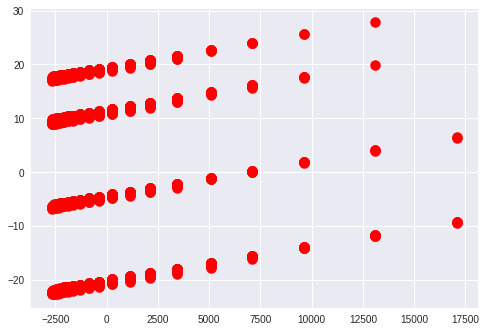

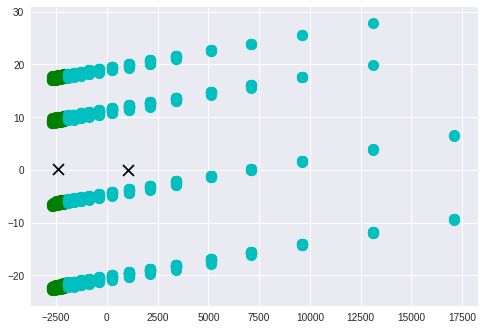

1038
465


KeyError: ignored

In [7]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
sklearn_pca_x = pca.fit_transform(L_float)
print(sklearn_pca_x)
# y = np.zeros((len(sklearn_pca_x),1)).astype(int)
#print(y)


import matplotlib.pyplot as plt
plt.scatter(sklearn_pca_x[:,0], sklearn_pca_x[:,1] , 
               marker=".", color="r", s=120, linewidths=5)
plt.show()




colors = 10*["g", "c", "r", "b", "k", "o"]

class K_Means:
    def __init__(self, k=2, tol=0.0001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
    
    def fit(self,data):
        self.centroids = {}
        
        for i in range(self.k):
            self.centroids[i] = data[i]
            
        for i in range(self.max_iter):
            self.classifications= {}
            
            for i in range(self.k):
                self.classifications[i] = []
            iter=0    
            for featureset in sklearn_pca_x:
                iter+=1
                #print(iter)
                distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)
                
            prev_centroids = dict(self.centroids)
            
            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification], axis=0)
                
            optimized =True
                
            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid - original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid - original_centroid)/original_centroid*100.0))
                    optimized = False
                
            if optimized:
                break
                    
                    
    def predict(self,data):
        distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification
    
clf = K_Means()
clf.fit(sklearn_pca_x)

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
               marker="x", color="k", s=120, linewidths=5)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker=".", color=color, s=150, linewidths=5)
        
        
plt.show()

print(len(clf.classifications[1]))
print(len(clf.classifications[0]))
print(len(clf.classifications[2]))
print(len(clf.classifications[3]))

# t-SNE and K-Means Clustering



[[-17.989164   42.622646 ]
 [-60.743675    6.2958355]
 [ 10.468608    7.3772054]
 ...
 [  6.0986276 -33.931053 ]
 [-21.099386  -11.30226  ]
 [  2.8291268  54.242504 ]]


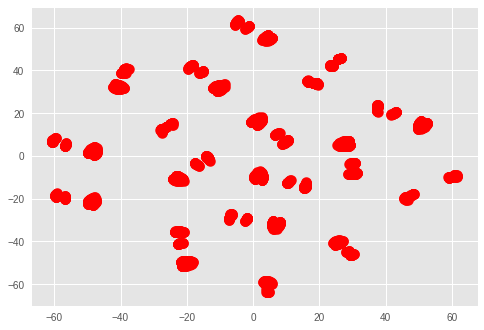

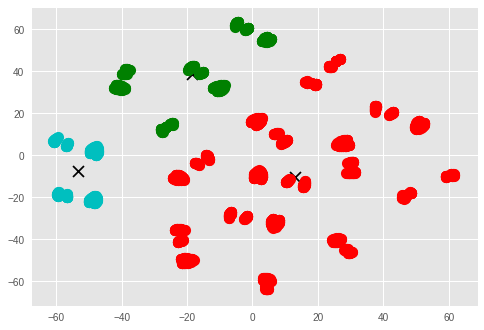

187
316
1000


KeyError: ignored

In [163]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
x_test_2d = tsne.fit_transform(L_float)

print(x_test_2d)

import matplotlib.pyplot as plt
plt.scatter(x_test_2d[:,0], x_test_2d[:,1] , 
               marker=".", color="r", s=120, linewidths=5)
plt.show()




colors = 10*["g", "c", "r", "b", "k", "o"]

class K_Means:
    def __init__(self, k=3, tol=0.0001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
    
    def fit(self,data):
        self.centroids = {}
        
        for i in range(self.k):
            self.centroids[i] = data[i]
            
        for i in range(self.max_iter):
            self.classifications= {}
            
            for i in range(self.k):
                self.classifications[i] = []
            iter=0    
            for featureset in x_test_2d:
                iter+=1
                #print(iter)
                distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)
                
            prev_centroids = dict(self.centroids)
            
            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification], axis=0)
                
            optimized =True
                
            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid - original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid - original_centroid)/original_centroid*100.0))
                    optimized = False
                
            if optimized:
                break
                    
                    
    def predict(self,data):
        distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification
    
clf = K_Means()
clf.fit(x_test_2d)

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
               marker="x", color="k", s=120, linewidths=5)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker=".", color=color, s=150, linewidths=5)
        
        
plt.show()

print(len(clf.classifications[1]))
print(len(clf.classifications[0]))
print(len(clf.classifications[2]))
print(len(clf.classifications[3]))